# Data Wrangling: Making data useful for analysis

This tutorial will demonstrate a way to load data from an uncommonly formatted file and change the data to a more common and usable format. 

The tutorial will use .CSV files as format for the raw input data and Pandas Data Frames as example of output data. The goal is to take the input data format and reorganize the data into a [Tidy Data Format](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

#### Learning outcomes
  - Understand the importance of data preparation 
  - Read and Write files from disk into a Jupyter Notebook
  - Manipulate Pandas Data Frames

### The best rat lab

We are dealing with a lab that studies animal behavior. This is one of the best labs. 

Generally in animal behavior labs rats are studied under different conditions that migth vary along several dimensions, for example, cognitive, social, emotional, biological (drugs) or genetic. 

The lab has developed a new strain of rats that seem to have interesting properties.  The new mutant mouse is [stronger, better, faster](https://www.youtube.com/watch?v=yydNF8tuVmU) than the wild type mouse. 

---

A new Research Assistant has spent the 2022 Spring Break in the lab measuring the fascinating behavioral abilities of the super rat.   We are lucky because we have been handed the amazing data from this new rat strain. 

Here after we will load the data and organize it into a more convenient format for plotting and further analysis.

---

### The data files

The data have been handed to us in a .CSV file. [The CSV file format](https://en.wikipedia.org/wiki/Comma-separated_values) is a very common format used in science and engineering to handle small datasets consisting of numerical recordings of events in time, space or other types of measurements.

CSV stands for Comma Separated Values. The commas separate the meaningful units of the data, these can be lables or actual numerical data. Data can be organized in rows or columns or both.

For example, let look at the anatomy of the dataset we were handed has the following structure (yes, OK we are hading a little bit ahead of us, as we have not loaded the data yet):

| male wild type | female wild type | male mutant | female mutant |
| --- | --- | --- | --- |
| 10 | 5 | 4 | 10 |
| 23 | 4 | 22 | 33 |
| 22 | 23 | 5 | 33 |
| 11 | 25 | 5 | 4 |

This is not a convenient format because the labels of interest (male/female, wild type/mutant) have been mixed up and their respective data separated. A more generally used and conveient organization of the same data would be the following:

| Data | Sex | Strain | 
| --- | --- | --- |
| 5 | M | Mutant |
| 6 | M | Mutant |
| 7 | M | Mutant |
| 4 | M | Mutant |
| 4 | F | Mutant |
| 7 | F | Mutant |
| 8 | F | Mutant |
| 4 | F | Mutant |
| 11 | M | Wild Type |
| 10 | M | Wild Type |
| 8 | M | Wild Type |
| 10 | M | Wild Type |
| 11 | F | Wild Type |
| 10 | F | Wild Type |
| 8 | F | Wild Type |
| 9 | F | Wild Type |

This format would allow making analyses that group the data based on the strain of the rats and their sex.

--- 

We made a video to show visually the type of data reorganization we will perform with the code hereafter.

[![We made a video to show the type of data reorganization we will perform with the code hereafter](https://img.youtube.com/vi/qR8rL0GiOKE/0.jpg)](https://www.youtube.com/watch?v=qR8rL0GiOKE).

### A peak at the dataset

Before we start coding, let's take a look at a snapshot of the dataset we are going to load. The numbers might be different but the basic structure of the dataset will be similar.

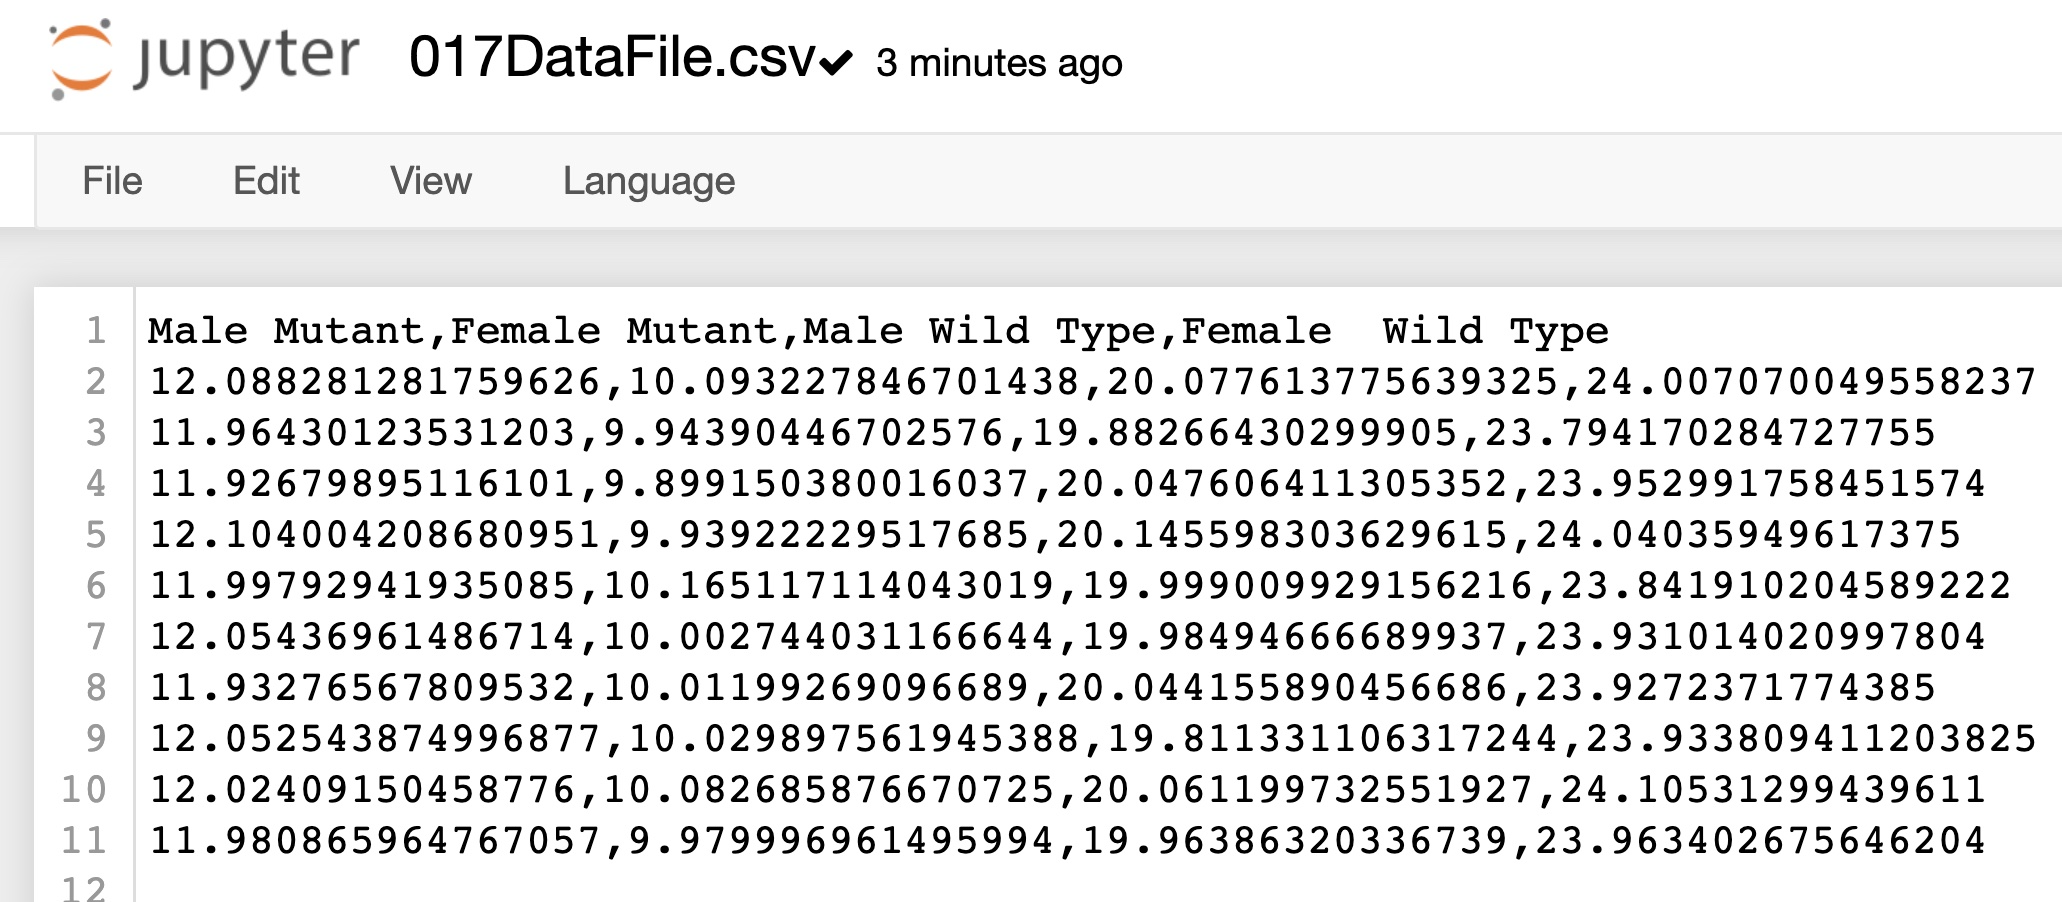

The data set has 10 rows of data and one of headers (labels for the various types of rats). The headers are on top of the file and the numerical data follows that. In our example, the numerical data represent reaction times. The rats had to run in a maze and the time it took them sto start the maze have been recorded in the data. 

All elements are separated by commas. Well indeed this is a CSV file! Good.

### Loading the dataset using Padas

We have used Pandas in the past. Pandas is one of the most used libraries for data science and more generally science.

Pandas uses DataFrames. Hereafter, we will load the dataset into a Pandas DataFrame.


In [ ]:
# We import Pandas
import pandas as pd

Pandas has a dedicated CSV reader. We will use the reader to load the CSV file into a `DataFrame` (`df`). Pandas will recognize the commas in the CSV (comma-separated file) and map the elements of the file into files of the data frame.

In [ ]:
df = pd.read_csv('datasets/017DataFile.csv')

Note. The above line will only work if the dataset is saved inside a folder called 'datasets', saved inside the current folder used to launch this Jupyter Notebook. Please make sure to create that folder (`mkdir`) and move (`mv`) the data file downloaded for this tutorial inside that folder. 

$\color{blue}{\text{Complete the following exercise.}}$

  - Identify other readers `Pandas` provide. Use the cell below to report 2-3 readers (write them down) and explain the type of file they each can read. (Hint. You can use `TAB` to find all the other methods that start with 'read'.)

After loading the dataset in a Pandas Data Frame, we can now take a look at the first five columns of the data frame by using the method `head`. Head returns the beginning of a data frame.

In [ ]:
df.head()

We can also use tail to look at the last 5 rows of the data frame.

In [ ]:
df.tail()

We can get some basic statistics about the dataset. The `describe` method of the pandas data frame will return the count, the mean the standard deviation, the min value, the the 25th, 50th and 75th percentile and the max value.

A good set of stats useful for many things.

In [ ]:
df.describe()

$\color{blue}{\text{Complete the following exercise.}}$

  - Test whether the method `describe` works only on `DataFrames` or also on `Series`. To do so use the cell below to creat a Pandas `Series` (it is not important what the series contains), and test with code whether the method works also for a `Series`.

  - Does the method `describe` take inputs? Use the cell below describe any additional inputs `describe` might take (if any). Explain what the input do/mean (if they exist).

### Reorganizing the dataset

As we described above instead of one column per type of rat (male mutant, female mutant, male wild type, female wild type) we would like to have all the data in the first column and the labels (male or female, wild type or mutant) in the second and third column respectively.

--- 

There are multiples ways to reorganize the dataset. We will use what is called slicing. 

We will address each column of the dataset using the header of the colum (the label). For example, below we address the first column of the data frame:

In [ ]:
df['Male Mutant']

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to show the third column of the dataset.

Our goal is to stack the data into the first column of a new data frame. After that, we will want to add the labels into the second and third columns of the new data frame.

Let's start by creating a new data frame. We have chose to start withg an empty data frame, create a column at the time and add the columns to the data frame as the data foreach column is created.

(This could have been done in at least a few different ways.)

In [ ]:
new_df = pd.DataFrame([])

In [ ]:
new_df

Next we want to stack the data from all the conditions of the original data frame into a single column data frame. 

We can do this by first initializng a data frame and after that stacking the data using the Pandas' command `concat` which stands for concatenation.

In [ ]:
data = pd.DataFrame()
data = pd.concat([df['Male Mutant'], 
                  df['Female Mutant'],
                  df['Male Wild Type'],
                  df['Female  Wild Type']])

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to describe what the method `concat` does to data frames.

Let's take a look at the data frame containing the data.

In [ ]:
data

Let's check its shape. it should be four times the size of each column of data (10), so 40.

In [ ]:
data.shape

The above seems to look all good except that if we notice the index of the individual data frames going from 0-9 have been kept in the new concatenated data frame. This is because by default Pandas will concatenate by and maintain the individual indices of the concatenated data frames.

To solve this, we will do the concatenation and set the variable `ignore_index` equal `True` that will tell Pandas to recast the indices instead of keeping the one of te original data frames concatenated. 

In [ ]:
data = pd.DataFrame()
data = pd.concat([df['Male Mutant'], 
                  df['Female Mutant'],
                  df['Male Wild Type'],
                  df['Female  Wild Type']],ignore_index=True)
data

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to describe what the `ignore_index=True` parameter does and what is the utility of such operation.

Now the indeces are sequential 0-39. Great!

Next, we will want to add the data just created into the first column of the data frame we want to create.

In [ ]:
new_df['Data'] = data 

We have now populated the first column of the new data frame with the data. Each entry comes from the original data frame loaded from the CSV. The data for the 4 different conditions are stancked so that the data for the 'Male Mutant' is first, that for the 'Female Mutant' is second, that for the 'Male Wild Type' third, and that for the 'Female  Wild Type' last.

In [ ]:
new_df

After adding the first column of data we will want to add the two missing columns defining the labels for each data point.

This step will create a column for the sex and one for thr strain

| Sex | Strain | 
| --- | --- |
| M | Mutant |
| M | Mutant |
| M | Mutant |
| M | Mutant |
| F | Mutant |
| F | Mutant |
| F | Mutant |
| F | Mutant |
| M | Wild Type |
| M | Wild Type |
| M | Wild Type |
| M | Wild Type |
| F | Wild Type |
| F | Wild Type |
| F | Wild Type |
| F | Wild Type |

Because the numerosity of each sample is known and equal across samples (10). We can use a simple assignment method to create what we need.

The first 10 elements of the Sex columns will be Males (coded as *M*), the next Females (coded as *F*), etc.

In [ ]:
sex = pd.DataFrame(['M','M','M','M','M','M','M','M','M','M',
                   'F','F','F','F','F','F','F','F','F','F',
                   'M','M','M','M','M','M','M','M','M','M',
                   'F','F','F','F','F','F','F','F','F','F'])
sex

We can now add a column to our data frame and the coding for sex. We can do this operation because the number of rows is the same between the two data frames.

In [ ]:
new_df['Sex'] = sex
new_df

OK Great in a few commands we have used added the sex labels. 

The final column to add is the rat strain. This is going to be as simple as creating the sex column. 

In [ ]:
strain = pd.DataFrame(['Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type',
                       'Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type',
                       'Mutant','Mutant','Mutant','Mutant','Mutant',
                       'Mutant','Mutant','Mutant','Mutant','Mutant',
                       'Mutant','Mutant','Mutant','Mutant','Mutant',
                       'Mutant','Mutant','Mutant','Mutant','Mutant'])
strain

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to explain in your own words what the cell above does. How did we organize the labels, and why?

Finally, we will add the new column labeling the rat strain:

In [ ]:
new_df['Strain'] = strain
new_df

Excellent, we are done. We have created the file we want using the original data and labels.

We can now save the file. To do that and to use compatibility with other readers of the data we will want to save the data frame in a CSV file. These files can be opened from multiple systems (MS Excell or Google Spreasheet are two examples). 

To save the data frame into a CSV we will use the data frame method `.to_csv()`, this will directly save the file.

In [ ]:
new_df.to_csv('datasets/tutorial017data_reorganized.csv')

We are done! We have loaded a poorly organized datasets and used operations and methods available in `data frames` to reorganize the format of the data into a `Tidy Data format`!

$\color{blue}{\text{Complete the following exercise.}}$

Note, that our code above, used a lot of *hard coded* sections. This does not make the code flexible, for example if a new dataset were handed to us say with 15 data entires per condition.

The goal here is to make the code adaptable to the number of rows in the original dataset handed to us. This is helpful because in principle the number of rows might vary every day.

For example ur RA might have colelcted 11 trials in Day 1 but only 8 in Day 2. In this scenario every day we would need to repeat a long chunk of code the following one:

```
strain = pd.DataFrame(['Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type',
                       'Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type','Wild Type','Wild Type',
                       'Wild Type','Wild Type',
                       'Mutant','Mutant','Mutant','Mutant','Mutant',
                       'Mutant','Mutant','Mutant','Mutant','Mutant',
                       'Mutant','Mutant','Mutant','Mutant','Mutant',
                       'Mutant','Mutant','Mutant','Mutant','Mutant'])
```

  - Can you think a way to use `loops` to avoid hard coding the above lines? For example, would it be possible to replace the block of code above using a for loop? Use the cell below to show your solution.

  - Alternatively can you think ways to use Pandas' `data frame` methods to populate the rows of your data frame flexibly? This means, that the length of the rows can change depending on the number of trials colelcted. Use the cell below to show your solution.
  
Hint. Pandas' [`series.repeat`](https://pandas.pydata.org/docs/reference/api/pandas.Series.repeat.html) might be a good start, if you prefer to use Pandas' instead of loops to make the code flexible that would be totally fine!

#### Summary

OK in this tutorial we have covered 
  - read/write operations for CSV files
  - operations formnipulating Pandas' Data Frames (create, add data, concatenation, add columns)
  - We have discussed considerations regarding data organization
  
Keep your file created today around, we will start from that next time!